In [2]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [19]:
def get_z(p_one,ptwo):
    num = ptwo - p_one
    denom = (p_one*(1-p_one)/32)**.5
    return num/denom

In [76]:
def get_z_two(p_one,p_two):
    num = (p_one[0]/p_one[1])-(p_two[0]/p_two[1])
    frac = (p_one[0]+p_two[0])/(p_one[1]+p_two[1])
    denom = (frac*(1-frac)*((1/p_one[1])+(1/p_two[1])))**.5
    #print(denom)
    return num/denom

In [125]:
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_seedoneone_coeff.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_seedtwoone_coeff.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
with open(filename,'rb') as f:
            dtabletwo =pickle.load(f)

In [126]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        #print(len(actions[k]))
        to_plot.append([sum(actions[k]),len(actions[k])])
    return to_plot


In [128]:
#seedtwo

In [129]:
pstwo = [get_z_two(seedone[i] ,seedtwo[i]) for i in range(len(seedone))]


In [130]:
pstwo


[0.0,
 1.7320508075688774,
 1.387777332977422,
 1.3581355894441791,
 0.6179143806533247,
 -1.7094086468945697,
 -2.06418738616856,
 1.9104070698188367,
 2.1021530912489745,
 0.0,
 -2.8613169175965067,
 -1.5191090506254994,
 0.3274539772641448,
 0.28653412753062585,
 -0.31829753506038383,
 1.8192560763660515,
 -0.3086066999241832,
 0.6299407883487117,
 0.3434182842192852,
 -1.3662601021279464,
 -0.33955755743545124,
 0.0,
 -0.6978227007909172,
 -1.5191090506254998,
 1.8405254345807762,
 -2.3421601750764793,
 -0.6666666666666661,
 -0.9743975315293802,
 0.9130630923032184,
 0.0,
 -0.40756957296961155,
 -0.33364240464065265,
 0.0,
 0.0,
 0.0,
 0.9548926051811496,
 -2.8490144114909493,
 -0.3038218101250995,
 0.4062996001466958,
 -1.7627089541790093,
 -3.1112698372208087,
 -3.489469517781743,
 -1.4491376746189437,
 0.6978227007909172,
 0.0,
 -4.256282653793742,
 -4.3576382352153775,
 0.0,
 0.6666666666666661,
 0.4062996001466958,
 -1.0894095588038444,
 -3.368301433282738,
 0.3456595427302998

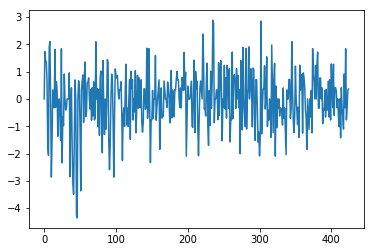

In [131]:
#plt.ylim([-6,6])
plt.plot(pstwo)


In [244]:
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_action_percentonly_twotwo.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_action_percentonly_oneone.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
with open(filename,'rb') as f:
            dtabletwo =pickle.load(f)




In [245]:
#seedone = get_to_plot_actions(dtable)
#seedtwo = get_to_plot_actions(dtabletwo)




In [246]:
def get_all(done,dtwo):
    alls = []
    for sim in sorted(done):
        print(sim)
        seedone = get_to_plot_actions(done[sim])
        seedtwo = get_to_plot_actions(dtwo[sim])
        pstwo = [get_z_two(seedone[i] ,seedtwo[i]) for i in range(len(seedone))]
        alls.append(pstwo)
    return alls
    
    
    
    

In [247]:
def get_stats(done,dtwo):
    alls_one = []
    alls_two = []
    for sim in sorted(done):
        print(sim)
        seedone = get_to_plot_actions(done[sim])
        seedtwo = get_to_plot_actions(dtwo[sim])
        alls_one.append([i[0]/i[1] for i in seedone])
        alls_two.append([i[0]/i[1] for i in seedtwo])
        #pstwo = [get_z_two(seedone[i] ,seedtwo[i]) for i in range(len(seedone))]
        
    return np.mean(np.array(alls_one),axis=0),np.mean(np.array(alls_two),axis=0)
    
    

In [248]:
alls = get_all(dtable,dtabletwo)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [249]:
m= np.mean(alls,axis=0)

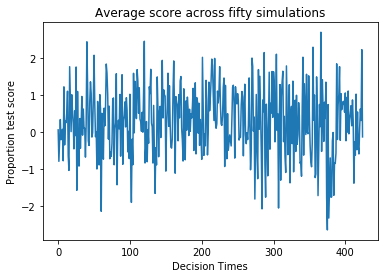

In [280]:
plt.plot(m)
plt.xlabel('Decision Times')
plt.ylabel('Proportion test score')
plt.title('Average score across fifty simulations')
plt.savefig('Fifty_simulations')

In [251]:
m.mean()

0.2898373074454069

In [133]:
from statsmodels.stats.proportion import proportions_ztest

In [142]:
def other(done,dtwo):
    
    alls = []
    ps = []
    for sim in sorted(done):
        print(sim)
        seedone = get_to_plot_actions(done[sim])
        seedtwo = get_to_plot_actions(dtwo[sim])
        temp = []
        for i in range(len(seedone)):
            counts  = np.array([seedone[i][0],seedtwo[i][0]])
            nobs = np.array([seedone[i][1],seedtwo[i][1]])
            z,p = proportions_ztest(counts,nobs)
            temp.append(z)
            print(p)
            ps.append(p)
        alls.append(temp)
            
    return alls,ps

In [151]:
o,pvals =  other(dtable,dtabletwo)

0
0.25144545354217307
1.3432058795467674e-07
7.674405132366524e-06
0.00107490990211751
0.00043116415862601157
4.962121326605242e-05
7.632872598471437e-08
0.9283533833195308
0.43206632510947196
0.2761617107304769
1.4240071878535465e-05
0.08040175966379065
0.6181120315133919
0.33310762916074277
0.01821081694785099
0.0008467818200543942
4.3885279292440264e-09
0.0017053226759057164
0.022757036901956466
3.297447285570896e-08
9.706280213627907e-12
4.338053081766603e-07
0.001977503434884933
3.841542244075556e-09
0.07516469382589225
0.0005109176615759164
0.0014022822807979811
0.0008039383021330132
0.22994377147704048
0.35413473177446486
0.003215069722102611
0.5843208110401176
0.401718263926661
0.5014477283193506
0.24124048764991868
0.06278104608007931
3.767723206392364e-09
0.019581384871167985
0.04938303088072665
0.00010258861973646478
1.231568229847775e-09
2.5075386835332688e-12
2.126574789451644e-06
0.006821662478999522
0.11384629800665792
2.6080659534365653e-13
1.228129840402291e-09
0.54527

1.0
0.2750293401389138
0.4385780260809996
0.47719661998876994
0.6337370592181911
0.22143973267201333
0.2694564051597773
0.7678782408415401
0.3334246598120262
0.32985919465547664
1.0
0.21986893044484557
0.7540008879177456
0.4385780260809996
0.7410783272612647
0.7150006546880887
0.06569113364419402
0.18532630419857976
1.0
1.0
0.26725749315438785
0.34485271047076294
0.6825698188332031
0.08596246943030102
0.76126364963642
0.35453947977350153
0.12282264810139244
1.0
0.21419302571912846
1.0
0.5103578488686932
0.32985919465547664
0.757620723683397
0.7376693530277811
0.5148277121984444
0.312950675522914
0.43657690985361763
0.1904302638255243
0.2766094170916621
0.7159691157693291
0.38753364025454584
0.5415520364256023
0.32985919465547664
0.7471398824099551
0.6825698188332031
1.0
0.22143973267201333
0.34235037274103697
0.5541131300694457
1.0
0.7139465459951917
0.7150006546880887
0.3840882494738517
0.27332167829229836
0.7168619749909111
0.5018697491109195
0.5253584044662418
0.4852880805781693
0.7

0.10437668659975605
0.7595328810501037
2.326639207602174e-07
0.6357149419721912
1.7650628543646725e-05
0.4718471091364045
0.7085968149359223
0.0640775064510596
1.5219933628622872e-06
6.645873265780867e-05
0.003711242806126069
0.05878172135535891
0.6825698188332031
0.3827330888852264
0.06788915486182893
0.025874997676242847
0.0004846253204594455
9.707932910673746e-08
2.3283888861582767e-06
0.18532630419857976
0.0022706589776426895
1.0
0.08954782175961924
1.0
0.0007563285572116876
0.5442896244294023
0.3758250874886985
0.12419239344721582
0.4815999681017724
0.47719661998876994
0.024733853560058784
0.000151494958312076
0.019016473672300485
0.5148277121984444
0.3853315267895522
0.002250226568085791
0.4385780260809996
1.0
0.6825698188332031
2.90609482006984e-08
0.48352205986804897
0.5524529048817779
1.7277406849531468e-10
1.6916386416679635e-09
2.808904043682897e-06
0.004331039182363326
0.6861678498552393
5.205380435382377e-08
9.908837169125558e-05
0.43657690985361763
0.07888530302601794
0.6

0.0001812665765220544
0.0001260464501208139
0.7471398824099551
0.681449996321341
0.2694564051597773
0.0015330518741596929
0.38125022508323236
0.1643942223916579
0.5078006482752728
0.4815999681017724
0.31686199864236364
0.7127948779904191
0.4435984319578372
0.7729885403677912
1.0
6
1.0
0.17356816655592167
0.2544505826463366
0.19670560245894686
0.4129314102883256
0.02751630974211466
0.003947751856903451
0.007898867250765888
0.04488411334563677
0.01734090568518853
0.011973137512469086
0.010327911545815398
0.5049850750938463
0.2646162170835885
0.7312838061826907
0.21109367113158117
0.0008179733199943956
0.7516150635445156
0.7328067121420331
0.5541131300694457
0.001724903129240792
0.312950675522914
0.3840882494738517
0.040875119298133165
0.12545785464424314
1.0
0.76126364963642
0.7595328810501041
1.0
0.5402913746074196
0.7139465459951917
0.2997458174654144
0.7139465459951917
0.3832718865170376
1.0
0.1360371281141434
0.0016222548081131754
0.7127948779904191
1.0
0.7115314177611215
0.002518665

0.7487740417065467
0.0001552963933404155
0.005069309556701599
0.21109367113158117
0.7777605913915767
1.0
0.015861332739773026
5.972808194899362e-06
0.12590011684661953
0.43657690985361763
1.0
0.0024680960944437843
0.0001552963933404155
0.06788915486182893
0.12133525035848222
1.0
8.37241503122545e-08
3.040003413570393e-08
0.3840882494738517
0.2750293401389138
1.0
0.0572509712645508
9.096680073059195e-06
0.7139465459951917
0.7127948779904191
1.0
1.1098979133753081e-06
0.00028364631530449646
0.1501635935449738
0.04220450214400493
0.12282264810139244
0.14291729456144517
0.04788610864839827
0.4435984319578372
0.7139465459951917
1.0
0.7733592188253104
0.046944726978481836
0.4463123209319426
0.7328067121420331
0.47719661998876994
0.00015207425141170456
1.0265979160693525e-05
0.3864762307712327
1.0
0.752857729208637
0.004385489392093785
0.0031075430075162306
0.18242243945173553
0.4404006981390034
0.5049850750938463
0.028601441589726242
5.966393833070147e-07
0.15276274311763136
0.37582508748869

In [152]:
mo= np.mean(o,axis=0)

Text(0.5, 1.0, 'Average score across ten simulations z-test')

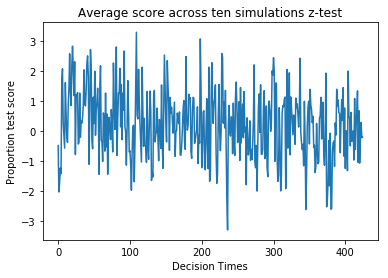

In [153]:
plt.plot(mo)
plt.xlabel('Decision Times')
plt.ylabel('Proportion test score')
plt.title('Average score across ten simulations z-test')

In [154]:
mo.shape

(425,)

In [155]:
mo.mean()

0.22785307988215564

In [164]:
np.percentile(np.array(pvals),25)

0.10157409015327842

In [252]:
len([k for k in m if k<-2 or k>2])/len(m)

0.03764705882352941

In [264]:
avgs = []
ones = []
twos = []
for i in range(len(seedone)):
    one = seedone[i][0]/seedone[i][1]
    ones.append(one)
    two = seedtwo[i][0]/seedtwo[i][1]
    twos.append(two)
    avgs.append((one+two)/2)

In [265]:
avgs[0]

0.5217391304347826

In [266]:
avgs[100]

0.7068965517241379

In [267]:
avgs[200]

0.8958333333333333

In [268]:
avgs[300]

0.8275862068965517

In [269]:
avgs[400]

0.6956521739130435

In [187]:
ones[100]

0.7586206896551724

In [188]:
twos[100]

0.6551724137931034

In [270]:
ones,twos = get_stats(dtable,dtabletwo)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [277]:
ones[0]

0.5318348122974379

In [278]:
twos[0]

0.5244412156442744

In [214]:
plot_two=[twos[i+3] for i in range(0,len(twos),5)]
plot_one=[ones[i+3] for i in range(0,len(ones),5)]

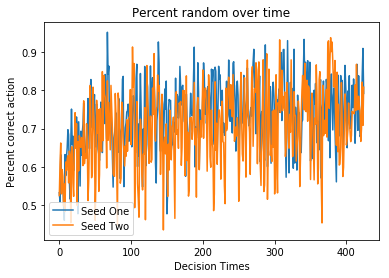

In [279]:
plt.plot(ones,label='Seed One')
plt.plot(twos,label='Seed Two')
plt.xlabel('Decision Times')
plt.ylabel('Percent correct action')
plt.legend(loc='lower left')
plt.title('Percent random over time')
plt.savefig('fifty_simulation_percent_both_seeds')